In [80]:
using FuzzyLogic

# Define the fuzzy inference system using the mamfis function
fis = @mamfis function rest_time(age, hours_worked)::rest
    # Define the domains and membership functions for age
    age := begin
        domain = 15:80
        junior = TrapezoidalMF(15, 15, 30, 35)
        mid = TrapezoidalMF(30, 35, 50, 60)
        senior = TrapezoidalMF(50, 60, 80, 80)
    end

    # Define the domains and membership functions for hours worked
    hours_worked := begin
        domain = 1:12
        little = TrapezoidalMF(1, 1, 2, 4)
        average = TrapezoidalMF(2, 4, 6, 8)
        much = TrapezoidalMF(6, 8, 12, 12)
    end

    # Define the domains and membership functions for rest
    rest := begin
        domain = 10:120
        light = TrapezoidalMF(10, 10, 15, 25)
        sufficient = TrapezoidalMF(15, 25, 60, 90)
        proper = TrapezoidalMF(60, 90, 120, 120)
    end

    age == junior && hours_worked == little --> rest == light
    age == junior && hours_worked == average --> rest == light
    age == junior && hours_worked == much --> rest == sufficient
    
    age == mid && hours_worked == little --> rest == light
    age == mid && hours_worked == average --> rest == sufficient
    age == mid && hours_worked == much --> rest == proper
    
    age == senior && hours_worked == little --> rest == sufficient
    age == senior && hours_worked == average --> rest == proper
    age == senior && hours_worked == much --> rest == proper

    and = MinAnd
    implication = ProdImplication
    aggregator = MaxAggregator
    defuzzifier = CentroidDefuzzifier
end

rest_time

Inputs:
-------
age ∈ [15, 80] with membership functions:
    junior = TrapezoidalMF{Int64}(15, 15, 30, 35)
    mid = TrapezoidalMF{Int64}(30, 35, 50, 60)
    senior = TrapezoidalMF{Int64}(50, 60, 80, 80)

hours_worked ∈ [1, 12] with membership functions:
    little = TrapezoidalMF{Int64}(1, 1, 2, 4)
    average = TrapezoidalMF{Int64}(2, 4, 6, 8)
    much = TrapezoidalMF{Int64}(6, 8, 12, 12)


Outputs:
--------
rest ∈ [10, 120] with membership functions:
    light = TrapezoidalMF{Int64}(10, 10, 15, 25)
    sufficient = TrapezoidalMF{Int64}(15, 25, 60, 90)
    proper = TrapezoidalMF{Int64}(60, 90, 120, 120)


Inference rules:
----------------
(age is junior ∧ hours_worked is little) --> rest is light
(age is junior ∧ hours_worked is average) --> rest is light
(age is junior ∧ hours_worked is much) --> rest is sufficient
(age is mid ∧ hours_worked is little) --> rest is light
(age is mid ∧ hours_worked is average) --> rest is sufficient
(age is mid ∧ hours_worked is much) --> 

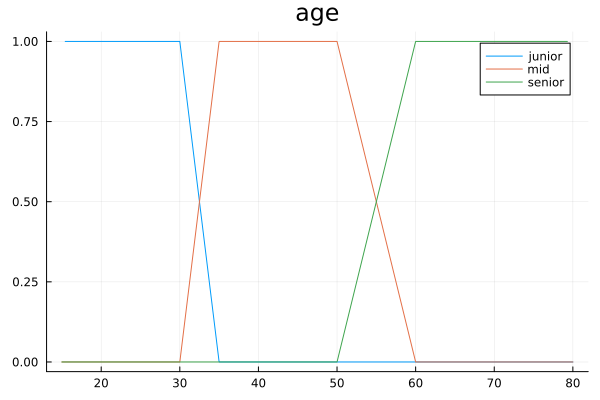

In [81]:
using Plots
plot(fis, :age)

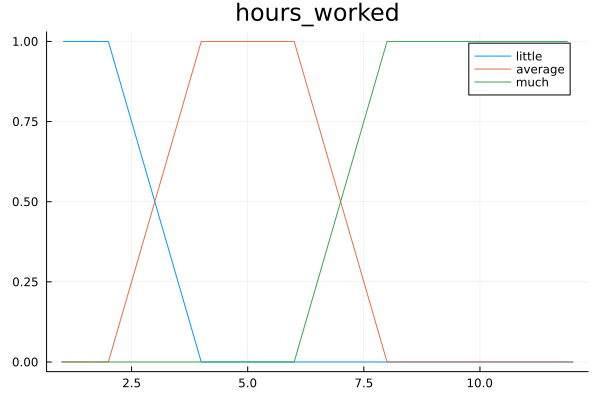

In [82]:
plot(fis, :hours_worked)

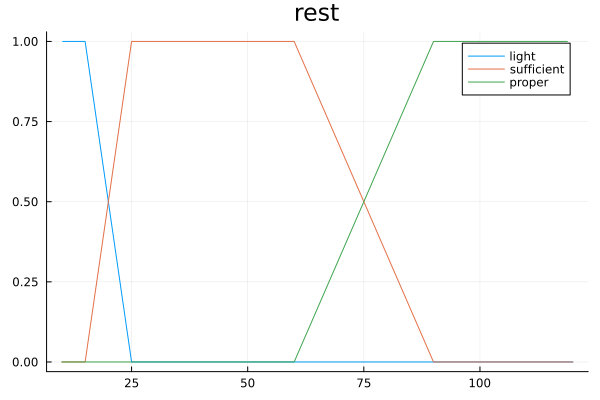

In [83]:
plot(fis, :rest)

In [84]:
fis(age=70, hours_worked=3)

1-element Dictionaries.Dictionary{Symbol, Float64}
 :rest │ NaN

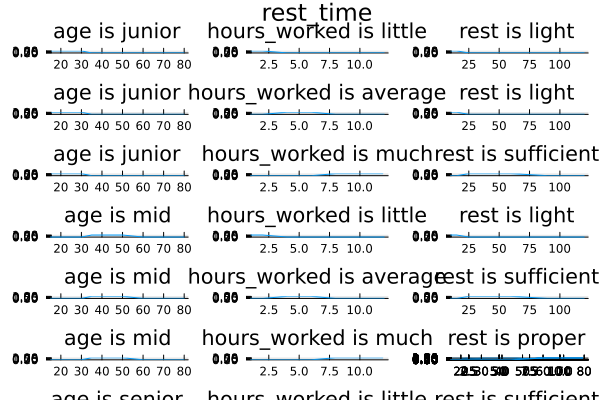

GKS: Viewport is not within the NDC unit square in routine SET_VIEWPORT
GKS: Viewport is not within the NDC unit square in routine SET_VIEWPORT
GKS: Viewport is not within the NDC unit square in routine SET_VIEWPORT
GKS: Viewport is not within the NDC unit square in routine SET_VIEWPORT
GKS: Viewport is not within the NDC unit square in routine SET_VIEWPORT
GKS: Viewport is not within the NDC unit square in routine SET_VIEWPORT
GKS: Viewport is not within the NDC unit square in routine SET_VIEWPORT
GKS: Viewport is not within the NDC unit square in routine SET_VIEWPORT
GKS: Viewport is not within the NDC unit square in routine SET_VIEWPORT
GKS: Viewport is not within the NDC unit square in routine SET_VIEWPORT
GKS: Viewport is not within the NDC unit square in routine SET_VIEWPORT
GKS: Viewport is not within the NDC unit square in routine SET_VIEWPORT
GKS: Viewport is not within the NDC unit square in routine SET_VIEWPORT
GKS: Viewport is not within the NDC unit square in routine SET_V

In [85]:
plot(fis)